In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import unicodedata
import re
import numpy as np
import os
import io
import time

In [2]:
from model import *

In [3]:
BATCH_SIZE = 16
embedding_dim = 256
units = 128

In [4]:
path_to_zip = tf.keras.utils.get_file(
    'spa-eng.zip', origin='http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip',
    extract=True)

path_to_file = os.path.dirname(path_to_zip)+"/spa-eng/spa.txt"

en_sentence = u"May I borrow this book?"
sp_sentence = u"¿Puedo tomar prestado este libro?"
print(preprocess_sentence(en_sentence))
print(preprocess_sentence(sp_sentence).encode('utf-8'))

en, sp = create_dataset(path_to_file, None)
print(en[-1])
print(sp[-1])

# Try experimenting with the size of that dataset
# num_examples = 118964
num_examples = 30000

input_tensor, target_tensor, inp_lang, targ_lang = load_dataset(path_to_file, num_examples)

<start> may i borrow this book ? <end>
b'<start> \xc2\xbf puedo tomar prestado este libro ? <end>'
<start> if you want to sound like a native speaker , you must be willing to practice saying the same sentence over and over in the same way that banjo players practice the same phrase over and over until they can play it correctly and at the desired tempo . <end>
<start> si quieres sonar como un hablante nativo , debes estar dispuesto a practicar diciendo la misma frase una y otra vez de la misma manera en que un musico de banjo practica el mismo fraseo una y otra vez hasta que lo puedan tocar correctamente y en el tiempo esperado . <end>


In [5]:
input_tensor = input_tensor[-30000:, :]
target_tensor = target_tensor[-30000:, :]

In [6]:
# Calculate max_length of the target tensors
max_length_targ, max_length_inp = max_length(target_tensor), max_length(input_tensor)

# Creating training and validation sets using an 80-20 split
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

BUFFER_SIZE = len(input_tensor_train)
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [7]:
vocab_inp_size = len(inp_lang.word_index)+1
vocab_tar_size = len(targ_lang.word_index)+1

In [8]:
my_model = NMT((vocab_inp_size, vocab_tar_size), inp_lang, targ_lang)

In [9]:
EPOCHS = 10

for epoch in range(EPOCHS):

    start = time.time()

    total_loss = 0

    for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):

        batch_loss = my_model.train(inp, targ)
        total_loss += batch_loss

        if batch % 100 == 0:
            print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                         batch,
                                                         batch_loss.numpy()))
            print('Time taken for 1 batch {:.1f} sec\n'.format(time.time() - start))

    print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                  total_loss / steps_per_epoch))
    print('Time taken for an epoch: {:.1f} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 4.5907
Time taken for 1 batch 23.3 sec

Epoch 1 Batch 100 Loss 2.4558
Time taken for 1 batch 28.5 sec

Epoch 1 Batch 200 Loss 2.3146
Time taken for 1 batch 33.8 sec

Epoch 1 Batch 300 Loss 2.1024
Time taken for 1 batch 39.1 sec

Epoch 1 Batch 400 Loss 2.2124
Time taken for 1 batch 44.4 sec

Epoch 1 Batch 500 Loss 2.2875
Time taken for 1 batch 49.6 sec

Epoch 1 Batch 600 Loss 2.1811
Time taken for 1 batch 54.9 sec

Epoch 1 Batch 700 Loss 2.2063
Time taken for 1 batch 60.2 sec

Epoch 1 Batch 800 Loss 2.0361
Time taken for 1 batch 65.5 sec

Epoch 1 Batch 900 Loss 2.0806
Time taken for 1 batch 70.9 sec

Epoch 1 Batch 1000 Loss 2.1325
Time taken for 1 batch 76.3 sec

Epoch 1 Batch 1100 Loss 1.9699
Time taken for 1 batch 81.7 sec

Epoch 1 Batch 1200 Loss 2.0894
Time taken for 1 batch 87.2 sec

Epoch 1 Batch 1300 Loss 1.9308
Time taken for 1 batch 92.7 sec

Epoch 1 Batch 1400 Loss 1.8191
Time taken for 1 batch 98.1 sec

Epoch 1 Loss 2.1380
Time taken for an epoch: 103.3 s

Epoch 9 Batch 300 Loss 0.3445
Time taken for 1 batch 16.3 sec

Epoch 9 Batch 400 Loss 0.3745
Time taken for 1 batch 21.8 sec

Epoch 9 Batch 500 Loss 0.3884
Time taken for 1 batch 27.3 sec

Epoch 9 Batch 600 Loss 0.3351
Time taken for 1 batch 32.8 sec

Epoch 9 Batch 700 Loss 0.3622
Time taken for 1 batch 38.3 sec

Epoch 9 Batch 800 Loss 0.3109
Time taken for 1 batch 43.8 sec

Epoch 9 Batch 900 Loss 0.2277
Time taken for 1 batch 49.3 sec

Epoch 9 Batch 1000 Loss 0.3696
Time taken for 1 batch 54.9 sec

Epoch 9 Batch 1100 Loss 0.2604
Time taken for 1 batch 60.4 sec

Epoch 9 Batch 1200 Loss 0.4332
Time taken for 1 batch 65.8 sec

Epoch 9 Batch 1300 Loss 0.3964
Time taken for 1 batch 71.3 sec

Epoch 9 Batch 1400 Loss 0.2698
Time taken for 1 batch 76.8 sec

Epoch 9 Loss 0.3451
Time taken for an epoch: 82.2 sec

Epoch 10 Batch 0 Loss 0.5037
Time taken for 1 batch 0.1 sec

Epoch 10 Batch 100 Loss 0.2168
Time taken for 1 batch 5.4 sec

Epoch 10 Batch 200 Loss 0.3754
Time taken for 1 batch 10.7 s

Input: <start> hace mucho frio aqui . <end>
Predicted translation: it s very cold here . <end> 


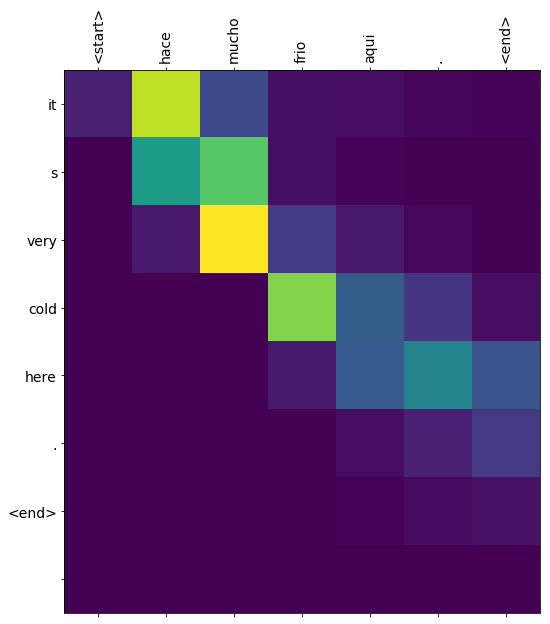

In [10]:
my_model.translate(u'hace mucho frio aqui.', max_length_targ, max_length_inp)

Input: <start> esta es mi vida . <end>
Predicted translation: this is my life . <end> 


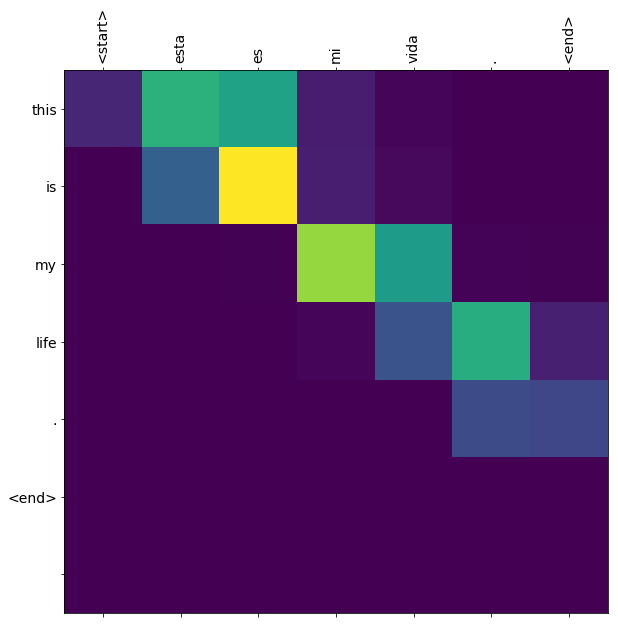

In [11]:
my_model.translate(u'esta es mi vida.', max_length_targ, max_length_inp)

Input: <start> ¿ todavia estan en casa ? <end>
Predicted translation: are you in home ? <end> 


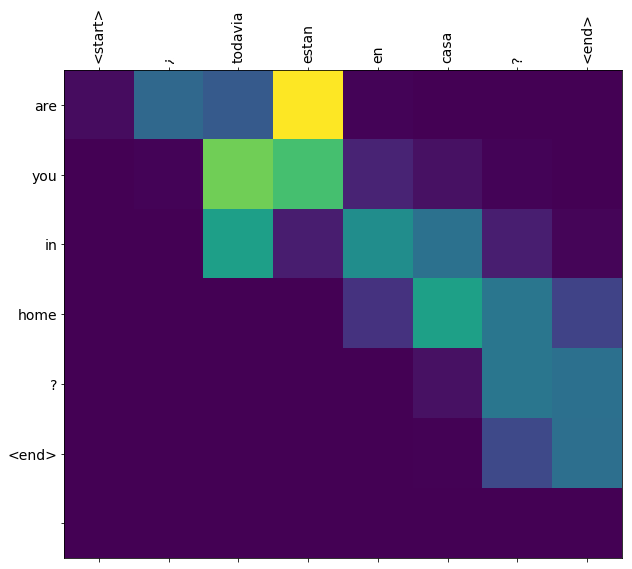

In [12]:
my_model.translate(u'¿todavia estan en casa?', max_length_targ, max_length_inp)

Input: <start> ¿ hay algun problema que pueda ayudar ? <end>
Predicted translation: is there to help ? <end> 


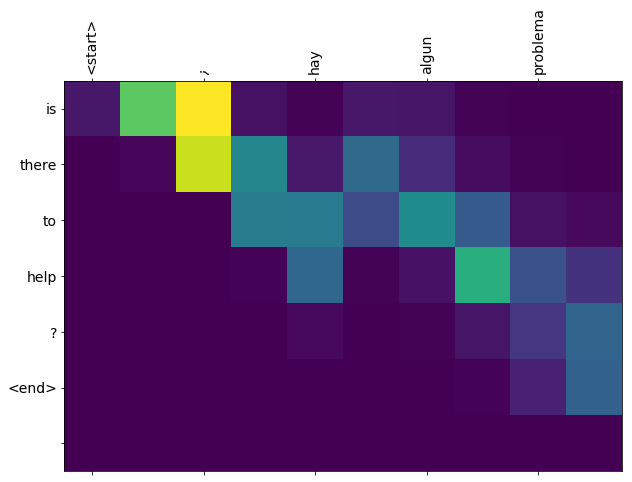

In [17]:
# wrong translation
my_model.translate(u'¿Hay algún problema que pueda ayudar?', max_length_targ, max_length_inp)